# IE 423 Quality Engineering
# Project Part 2

## Tasks

### Part 1

In [3]:
library(jpeg)

Required "jpeg" library is called.

In [4]:
img <- readJPEG("C:/Users/Arda/Desktop/xxx.jpeg" , native=FALSE)
str(img)

 num [1:400, 1:400, 1:3] 0.545 0.541 0.667 0.604 0.78 ...


Greyscale image is scanned.

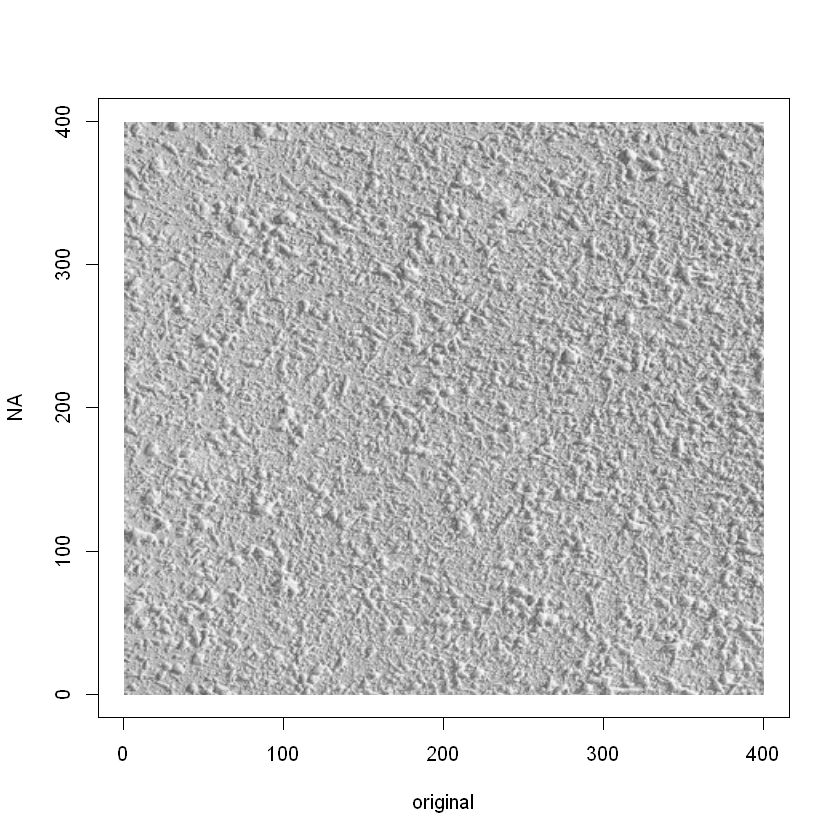

In [5]:
y<-img[,,1]
plot(NA,xlab="original",xlim=c(0,nrow(y)),ylim=c(0,ncol(y)))
rasterImage(y,0,0,nrow(y),ncol(y))

Original image is displayed.

#### a)

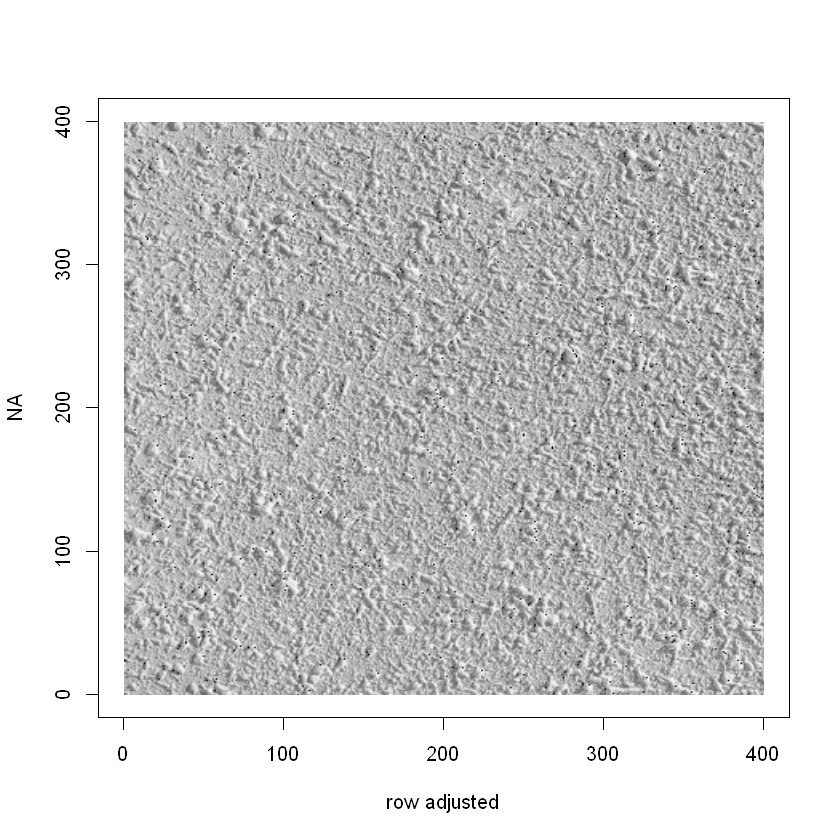

In [6]:
seq<-c(1:400)
temp<-y

for(i in seq){
q_alt<-quantile(temp[i,], pnorm(-3))
q_ust<-quantile(temp[i,], pnorm(3))
temp[i,][temp[i,]<q_alt] <- 0
temp[i,][temp[i,]>q_ust] <- 0
}

plot(NA,xlab="row adjusted",xlim=c(0,nrow(temp)),ylim=c(0,ncol(temp)))
rasterImage(temp,0,0,nrow(temp),ncol(temp))

To find the pixels that are out of control, three sigma limits are applied for each row. After finding those pixels, the value of these pixels are changed to zero. After that operation, the new image is displayed. It looks like black pixels are randomly distributed.

#### b)

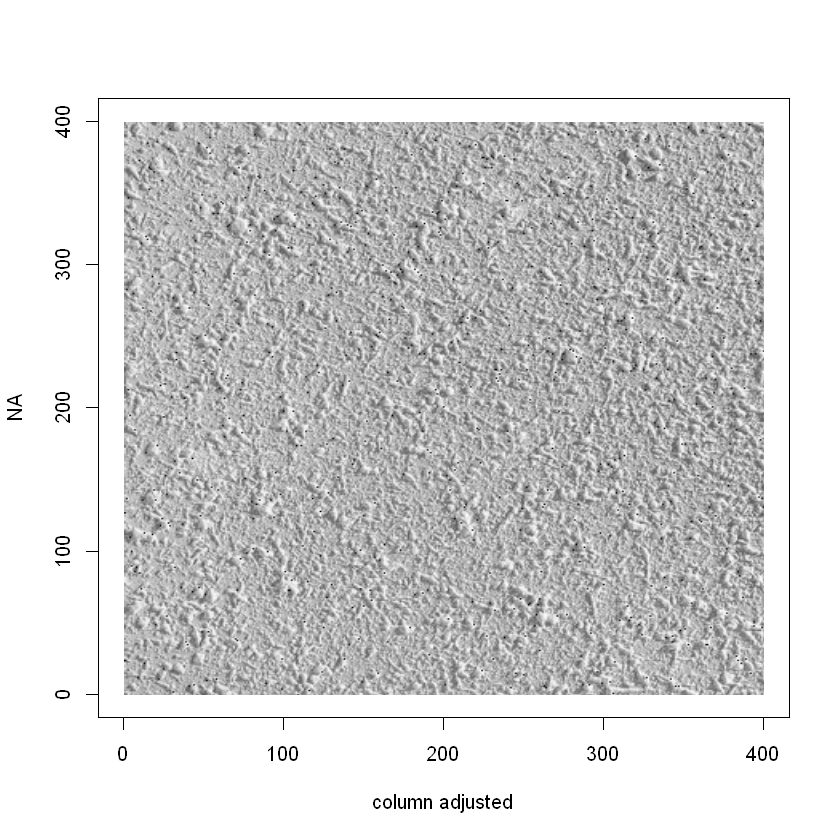

In [7]:
seq<-c(1:400)
temp2<-y

for(i in seq){
q_alt<-quantile(temp2[,i], pnorm(-3))
q_ust<-quantile(temp2[,i], pnorm(3))
temp2[,i][temp2[,i]<q_alt] <- 0
temp2[,i][temp2[,i]>q_ust] <- 0
}

plot(NA,xlab="column adjusted",xlim=c(0,nrow(temp2)),ylim=c(0,ncol(temp2)))
rasterImage(temp2,0,0,nrow(temp2),ncol(temp2))

To find the pixels that are out of control, three sigma limits are applied for each column. After finding those pixels, the value of these pixels are changed to zero. After that operation, the new image is displayed. Again, it looks like black pixels are randomly distributed.

In [8]:
count1=0
for(i in seq){
    for(j in seq){
        if(temp[i,j]==0){
            count1<-(count1+1)
        }
    }
}

The number of newly painted black pixels in the row adjusted image is counted.

In [9]:
count2=0
for(i in seq){
    for(j in seq){
        if(temp2[i,j]==0){
            count2<-(count2+1)
        }
    }
}

The number of newly painted black pixels in the column adjusted image is counted.

In [10]:
count1
count2

[1] 723

[1] 697

Since the number of black pixels in the row adjusted image is slightly greater, we can say that our model identified a few more out of control pixels when we built the model based on rows. Thus, it can be concluded that there are more or less same amount of pixels that are out of three sigma control limits in both models.  And this result is harmonious with the assumption that indicates the distribution of the pixels are the same horizontally and vertically.

### Part 2

In [9]:
imgdata<-img[,,1]
patchsize=51
patchnumber=350
datamatrix<-matrix(rep(0,((patchsize)^2)*((patchnumber)^2)),ncol=((patchsize)^2))
str(datamatrix)

 num [1:122500, 1:2601] 0 0 0 0 0 0 0 0 0 0 ...


We created a 122500x2601 matrix.

In [10]:
row<-rep(0,((patchsize)^2))
str(row)

 num [1:2601] 0 0 0 0 0 0 0 0 0 0 ...


We created an array. 

In [11]:
count=1

In [12]:
for (i in 26:375){
    for(j in 26:375){
        row <- as.vector(imgdata[(i-25):(i+25),(j-25):(j+25)])
        datamatrix[count,]<-row
        count<-(count+1)
    }
}

We filled our matrix.

In [13]:
count

[1] 122501

Count shows that our loop worked successfully.

In [14]:
y=datamatrix[,1301]
datamatrixtrain=datamatrix[,-1301]

We created our train data for the linear regression model by substracting the center pixel column.

In [15]:
str(datamatrixtrain)

 num [1:122500, 1:2600] 0.545 0.871 0.737 0.792 0.773 ...


In [16]:
modelimiz<-lm(y~datamatrix[,-1301])

We built our linear regression model.

In [17]:
summary(modelimiz)


Call:
lm(formula = y ~ datamatrix[, -1301])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42019 -0.05995  0.00123  0.06086  0.37963 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.321e-02  1.545e-02   0.855 0.392676    
datamatrix[, -1301]1    -1.198e-03  2.362e-03  -0.507 0.612002    
datamatrix[, -1301]2     1.441e-03  2.708e-03   0.532 0.594537    
datamatrix[, -1301]3    -5.129e-03  2.752e-03  -1.864 0.062373 .  
datamatrix[, -1301]4     5.597e-03  2.761e-03   2.027 0.042682 *  
datamatrix[, -1301]5    -3.777e-03  2.763e-03  -1.367 0.171609    
datamatrix[, -1301]6     2.645e-03  2.763e-03   0.957 0.338377    
datamatrix[, -1301]7     1.071e-03  2.764e-03   0.387 0.698416    
datamatrix[, -1301]8    -3.487e-03  2.764e-03  -1.262 0.207116    
datamatrix[, -1301]9     5.144e-04  2.765e-03   0.186 0.852405    
datamatrix[, -1301]10   -1.588e-03  2.765e-03  -0.574 0.565782    
datamatrix[, -1301]11    6.431e-

Our adjusted R-squared value is 0.5836.

In [18]:
install.packages("fitdistrplus")
library("fitdistrplus")

Installing package into 'C:/Users/Arda/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'fitdistrplus' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Arda\AppData\Local\Temp\RtmpMvgW46\downloaded_packages


Loading required package: MASS
Loading required package: survival
Loading required package: npsurv
Loading required package: lsei


Required "fitdistrplus" library is installed and called.

In [19]:
fit <- fitdist(modelimiz$residual,distr="norm")

We used "fitdist" function to check if residuals are looking like Normal distribution.

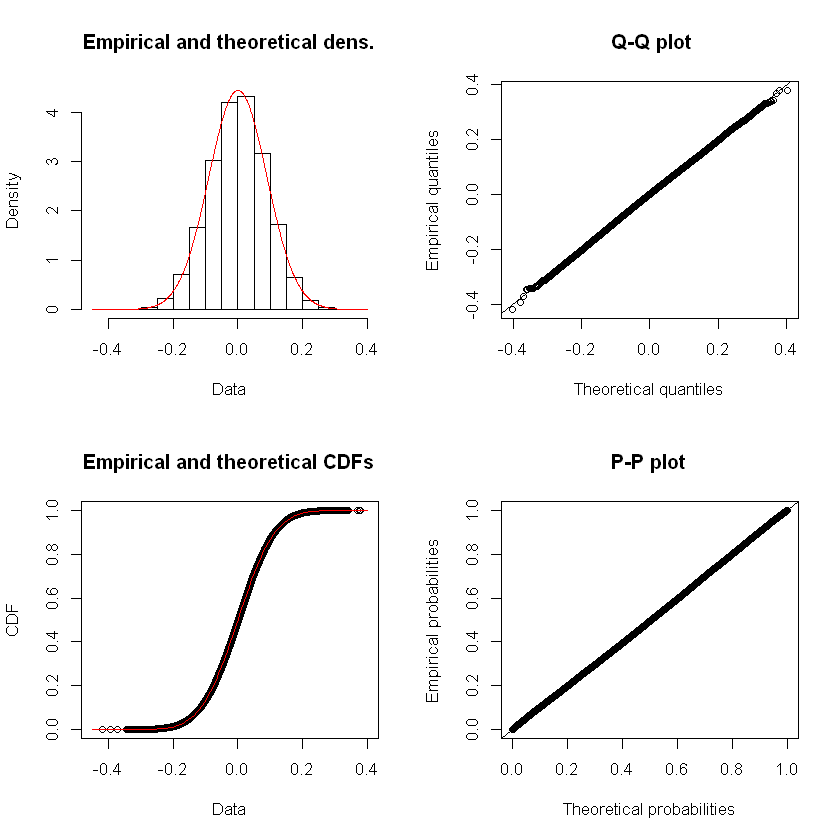

In [20]:
plot(fit)

Above plots indicate that residuals are looking like Normal distribution.

In [21]:
ctrl<-modelimiz$residual
imgdata2<-imgdata

In [22]:
q_alt<-quantile(ctrl, pnorm(-3))
q_ust<-quantile(ctrl, pnorm(3))

q_alt
q_ust

0.1349898% 
-0.2748658

99.86501% 
0.2654565

To find the residuals that are out of control, three sigma limits are applied.

In [23]:
for(i in 1:length(ctrl)){
if((ctrl[i]<q_alt)|(ctrl[i]>q_ust)){
    
    if((i%%350) != 0){
    imgdata2[(25+ceiling(i/350)),(25+(i%%350))]<-0
        }
    else{
    imgdata2[(25+ceiling(i/350)),(375)]<-0
    }
}
}



After finding those residuals, the value of the corresponding pixels are changed to zero.

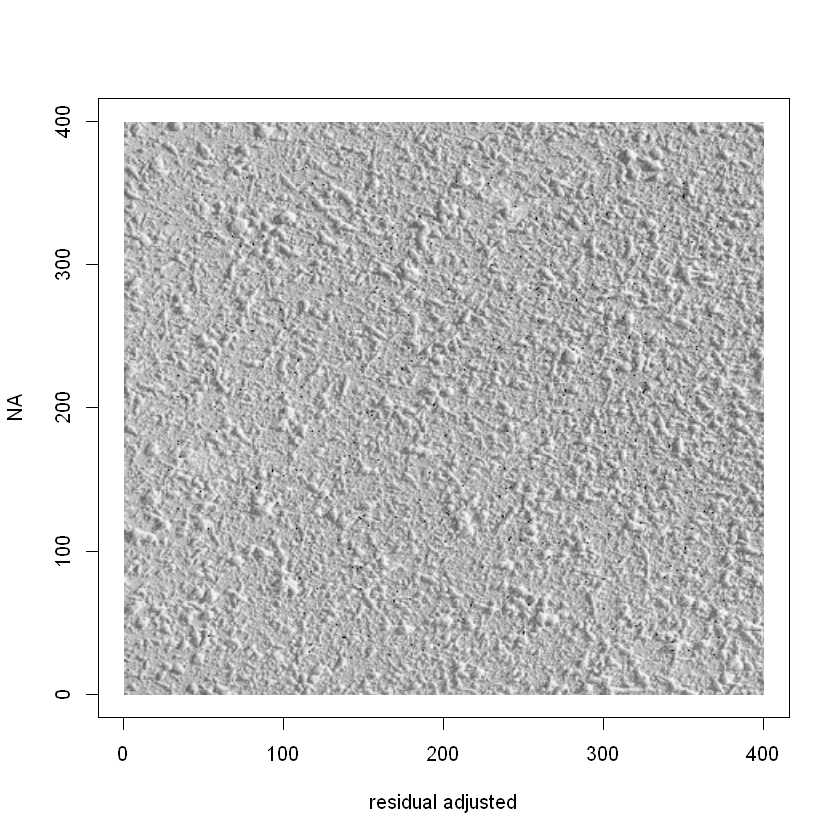

In [24]:
plot(NA,xlab="residual adjusted",xlim=c(0,nrow(imgdata2)),ylim=c(0,ncol(imgdata2)))
rasterImage(imgdata2,0,0,nrow(imgdata2),ncol(imgdata2))

After that operation, the new image is displayed. It looks like black pixels are randomly distributed. When a center pixel is not forecasted properly by linear regression, the corresponding residual will be out of control limits. We can say that the center pixel is not harmonious with the surrounding pixels. The reason could be due to that 51x51 window's texture.

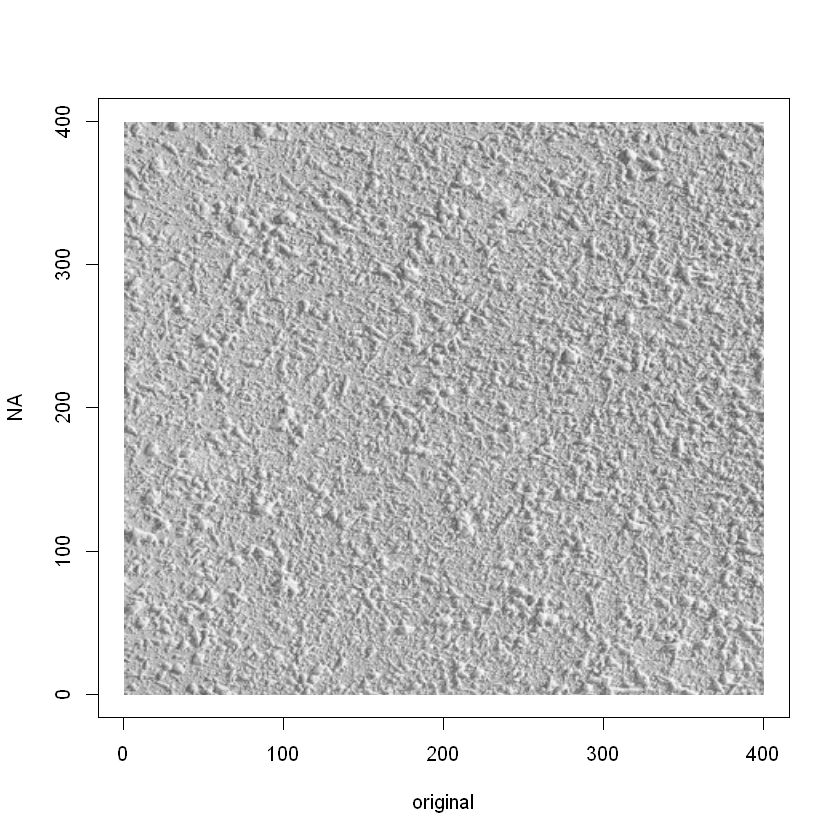

In [25]:
plot(NA,xlab="original",xlim=c(0,nrow(imgdata)),ylim=c(0,ncol(imgdata)))
rasterImage(imgdata,0,0,nrow(imgdata),ncol(imgdata))

Original image is displayed.

In [26]:
count3=0
for(i in 1:400){
    for(j in 1:400){
        if(imgdata2[i,j]==0){
            count3<-(count3+1)
        }
    }
}

In [27]:
count3

[1] 332

332/122500 = 0.27%. It can be concluded that three sigma limits were applied successfully.

#### Alternative Solutions to Autocorrelation Problem

We can propose two ways to handle the autocorrelation problem.

- First way is adding more predictors to improve model fit. However, in this case it does not seem a viable solution. Because finding an extra predictor seems very hard.

- Second way is building an ARIMA(p,0,0) model which equals to an AR(p) model. AR stands for "autoregressive". The AR(p) model could handle the autocorrelation problem by taking into account the structure in the residuals and reducing the confidence in the predictors accordingly. We covered those models in IE 360 class.